In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('glass.csv')

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.shape

(214, 10)

In [6]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
data.nunique(axis=0)

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [8]:
set(data.Type)

{1, 2, 3, 5, 6, 7}

In [9]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
# data.dropna(inplace=True)

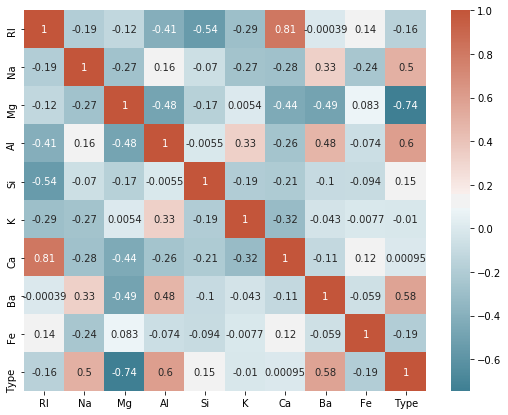

In [110]:
corr = data.corr()# plot the heatmap
plt.subplots(figsize=(9,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

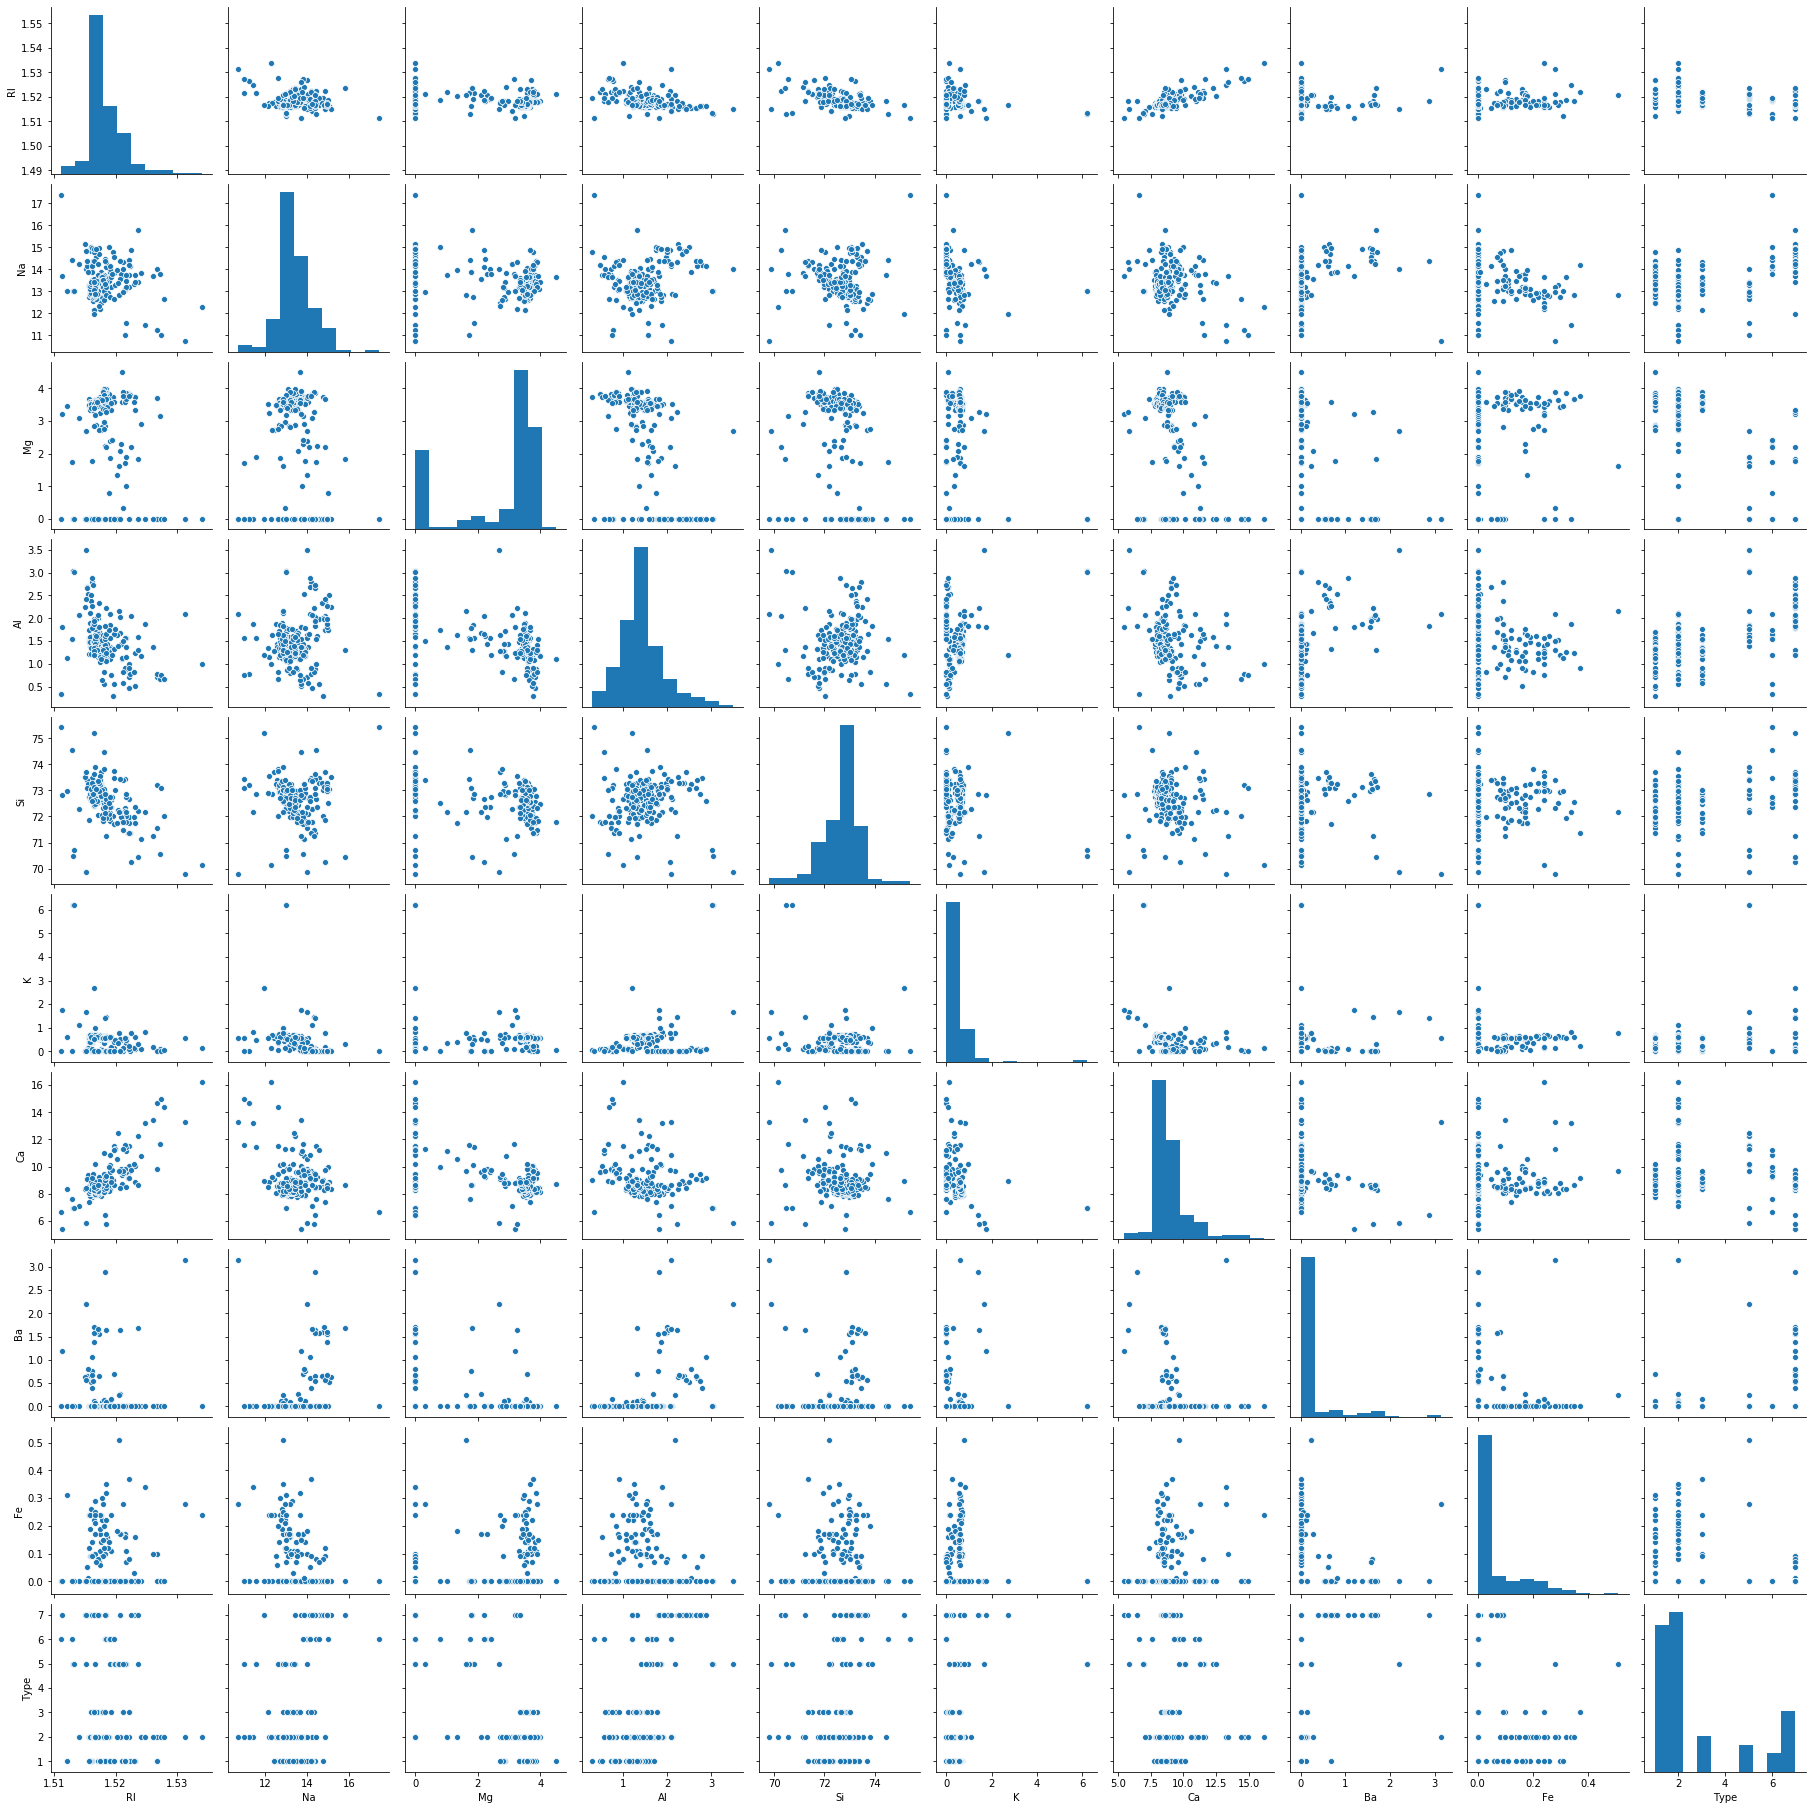

In [10]:
sns.pairplot(data)

In [11]:
from sklearn.model_selection import train_test_split   
from scipy.stats import mode 
from sklearn.neighbors import KNeighborsClassifier 

In [12]:
X = data.iloc[:,:-1].values 
Y = data.iloc[:,-1:].values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0 )

In [14]:
X_test = np.array(X_test)
X_train = np.array(X_train)
Y_train = np.array(Y_train.ravel())
Y_test = np.array(Y_test.ravel())

In [15]:
def euclidean_distance(x,y):
    return np.sqrt( np.sum( np.square( x - y ) ) )

In [16]:
def KNN(X_train,Y_train,X_test,K):
    Y_pred = []
    for i in range(len(X_test)):
        ed = []
        for j in range(len(X_train)):
            ed.append((euclidean_distance(X_train[j],X_test[i]),Y_train[j]))
        ed.sort()
        ed = ed[:K]
        classes = []
        for k in ed:
            classes.append(k[1])  
        Y_pred.append(mode(classes)[0][0])
    return Y_pred

In [17]:
def func(X_train,Y_train,X_test,Y_test,rangek):
    accuracies = []
    for i in range(1,rangek):
        count,count1 = 0, 0
        Y_pred = KNN(X_train,Y_train,X_test,i)
        model = KNeighborsClassifier( n_neighbors = i ) 
        model.fit( X_train, Y_train )
        Y_pred1 = model.predict( X_test )
        Y_pred1 = Y_pred1.reshape((Y_pred1.shape[0],1))
        for j in range(len(Y_pred)):
            if Y_pred[j] == Y_test[j]:
                count += 1
            if Y_pred1[j] == Y_test[j]:
                count1 += 1
        print("For K =",i)
        print("Accuracy of our model       :  " + str((count / len(Y_pred) ) * 100 ))
        accuracies.append(count / len(Y_pred) * 100)
        print( "Accuracy of sklearn model:  " + str((count1 / len(Y_pred) ) * 100 )) 
        print()
    return accuracies

In [18]:
accuracies = func(X_train,Y_train,X_test,Y_test,20)

For K = 1
Accuracy of our model       :  72.72727272727273
Accuracy of sklearn model:  72.72727272727273

For K = 2
Accuracy of our model       :  54.54545454545454
Accuracy of sklearn model:  54.54545454545454

For K = 3
Accuracy of our model       :  54.54545454545454
Accuracy of sklearn model:  54.54545454545454

For K = 4
Accuracy of our model       :  50.0
Accuracy of sklearn model:  50.0

For K = 5
Accuracy of our model       :  50.0
Accuracy of sklearn model:  50.0

For K = 6
Accuracy of our model       :  50.0
Accuracy of sklearn model:  50.0

For K = 7
Accuracy of our model       :  50.0
Accuracy of sklearn model:  50.0

For K = 8
Accuracy of our model       :  50.0
Accuracy of sklearn model:  50.0

For K = 9
Accuracy of our model       :  50.0
Accuracy of sklearn model:  50.0

For K = 10
Accuracy of our model       :  45.45454545454545
Accuracy of sklearn model:  45.45454545454545

For K = 11
Accuracy of our model       :  40.909090909090914
Accuracy of sklearn model:  40.909

Text(0, 0.5, 'Accuracy (%)')

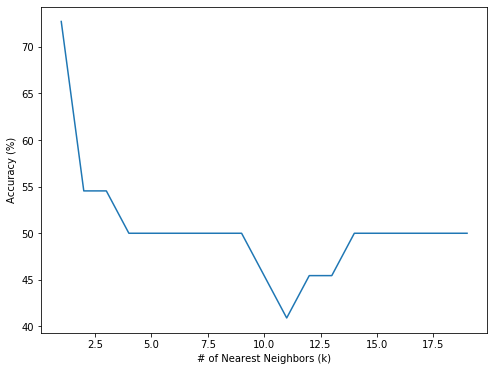

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,20), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

In [20]:
# from sklearn import datasets, neighbors
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(X_train, Y_train, clf=model1, legend=2)
# # Adding axes annotations
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Knn with K='+ str(k))
# plt.show()

In [21]:
iris_data = pd.read_csv('Iris.csv')

In [22]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
set(iris_data.Species)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

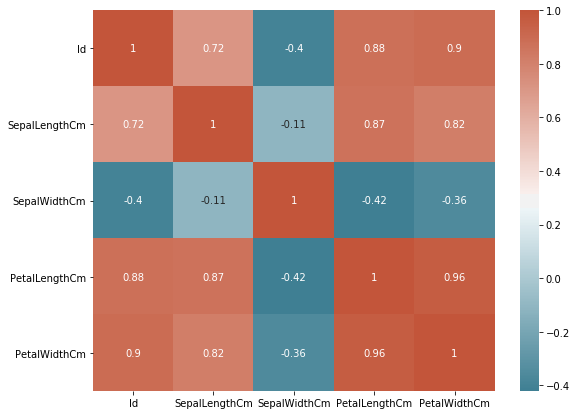

In [25]:
corr = iris_data.corr()# plot the heatmap
plt.subplots(figsize=(9,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

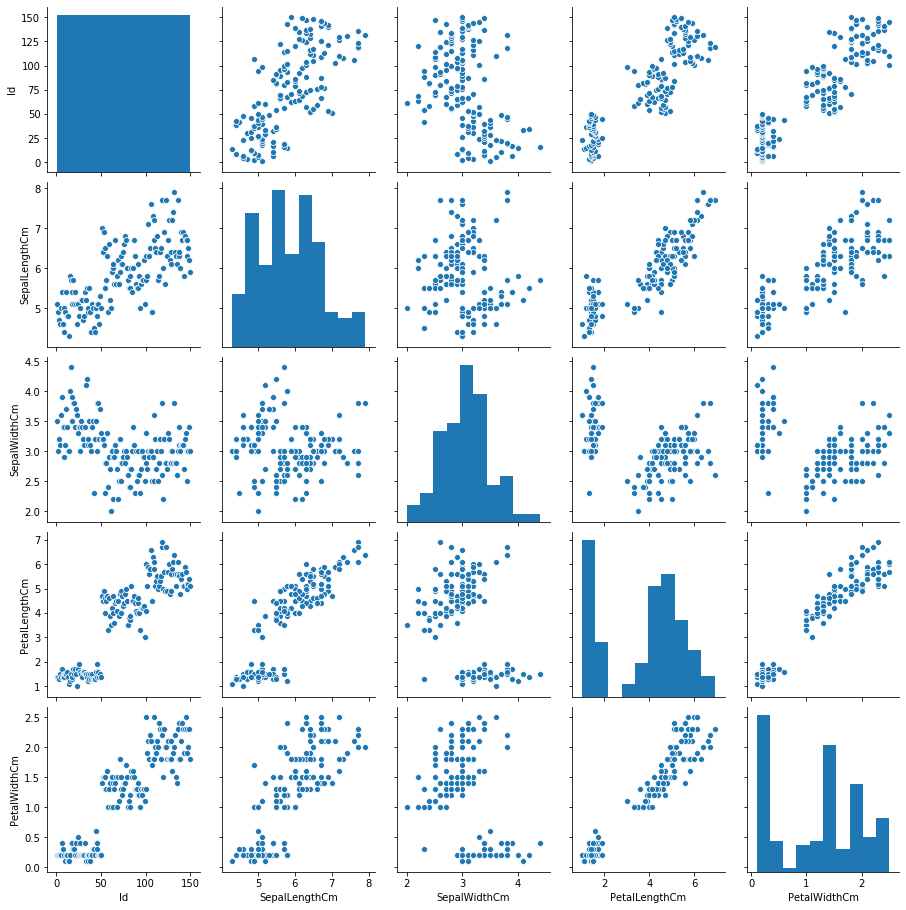

In [26]:
sns.pairplot(iris_data)

In [76]:
iris_data.replace({"Species":{'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}},inplace=True)
X_iris = iris_data.iloc[:,:-1].values 
Y_iris = iris_data.iloc[:,-1:].values
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(X_iris, Y_iris, test_size = 0.2, random_state = 0 )
X_test_iris = np.array(X_test_iris)
X_train_iris = np.array(X_train_iris)
Y_train_iris = np.array(Y_train_iris.ravel())
Y_test_iris = np.array(Y_test_iris.ravel())

In [77]:
accur_iris = func(X_train_iris,Y_train_iris,X_test_iris,Y_test_iris,5)

For K = 1
Accuracy of our model       :  100.0
Accuracy of sklearn model:  100.0

For K = 2
Accuracy of our model       :  100.0
Accuracy of sklearn model:  100.0

For K = 3
Accuracy of our model       :  100.0
Accuracy of sklearn model:  100.0

For K = 4
Accuracy of our model       :  100.0
Accuracy of sklearn model:  100.0



Text(0, 0.5, 'Accuracy (%)')

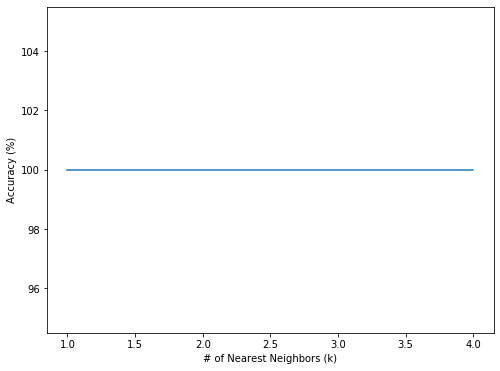

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,5), accur_iris)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')